# STAT 201: Group 29 Project Proposal
##### Brian Moniaga, Jiahe Jiang, Jiakang Huang, Nolan Vibhakar
##### Date: October 29th, 2023

## Import packages:

In [4]:
# Use the library function to load the R packages
library(tidyverse)
library(repr)
library(readxl)
library(cowplot)
library(RColorBrewer)
library(tidymodels)

## Introduction:
Investigating the factors that affect students' academic grades is a crucial area of research with significant implications for educational institutions, policymakers, and society as a whole. Understanding these factors can help us estimate educational outcomes for students. Several published journals and studies highlight the importance of this research area. One of these aspects is their impact on graduation rates. A study by Pascarella and Terenzini (2005) emphasizes that academic performance is a strong predictor of whether a student will complete their degree. Furthermore, investigating these factors can make us aware of educational inequalities. [A research paper by Reardon (2011) ](https://cepa.stanford.edu/sites/default/files/reardon%20whither%20opportunity%20-%20chapter%205.pdf) claims that students from different socioeconomic backgrounds often face disparities in academic achievement. Last but not least, Makewa et al.(2012) propose that parents might also have an impact on students' grades. To conduct further investigation, we obtained a dataset from UCI. This dataset considers 31 factors related to the academic success of 145 students, with a specific focus on the education level of students' parents. The students will be sorted based on whether they come from highly educated families (where at least one parent has gone to university) or not. By analyzing the data, we can effectively assess students' academic success based on their parents' education level.

<img src="https://media3.giphy.com/media/IPbS5R4fSUl5S/giphy.gif?cid=ecf05e47x87f3pqmvs9tgypbylzin60fkzte2tcf7hhf1849&rid=giphy.gif&ct=g" width = "800"/>

Source: https://media3.giphy.com/media/IPbS5R4fSUl5S/giphy.gif

## Data Analysis:

In [5]:
# Read the CSV file
student_data <- read.csv("https://raw.githubusercontent.com/DanielHuangjiakang/STAT201-Group-Project_29/main/student.csv", header = TRUE) |>
    select(Mothers_Education, Fathers_Education, CGPA_Last_Semester) |>
    mutate(high_education_family = if_else(Mothers_Education > 3 | Fathers_Education > 3, TRUE, FALSE), 
          academically_successful = if_else(CGPA_Last_Semester > 3, TRUE, FALSE))
head(student_data, 5)
print("Table 1: Student Data table")

,Mothers_Education,Fathers_Education,CGPA_Last_Semester,high_education_family,academically_successful
,<int>,<int>,<int>,<lgl>,<lgl>
1,1,2,1,FALSE,FALSE
2,2,3,2,FALSE,FALSE
3,2,2,2,FALSE,FALSE
4,1,2,3,FALSE,FALSE
5,3,3,2,FALSE,FALSE


[1] "Table 1: Student Data table"


#### There are 145 students contained in this dataset
* `Mothers_Education`: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)
* `Fathers_Education`: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)
* `CGPA_Last_Semester`(/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)
* `high_education_family`: A student is considered to be from a high-education family if **at least one** of their parents has attended university
* `academically_successful`: A student is considered academically successful if their GPA last semester was **3.0 or higher**

low_education_family,high_education_family
<dbl>,<dbl>
0.4509804,0.4418605


[1] "Table 2: Proportion of acedmically successful students for each level of family education"


high_education_family,mean,sd
<lgl>,<dbl>,<dbl>
FALSE,3.186275,1.224586
TRUE,2.976744,1.471772


[1] "Table 3: Summary of CGPA Last Semester by Family Education"


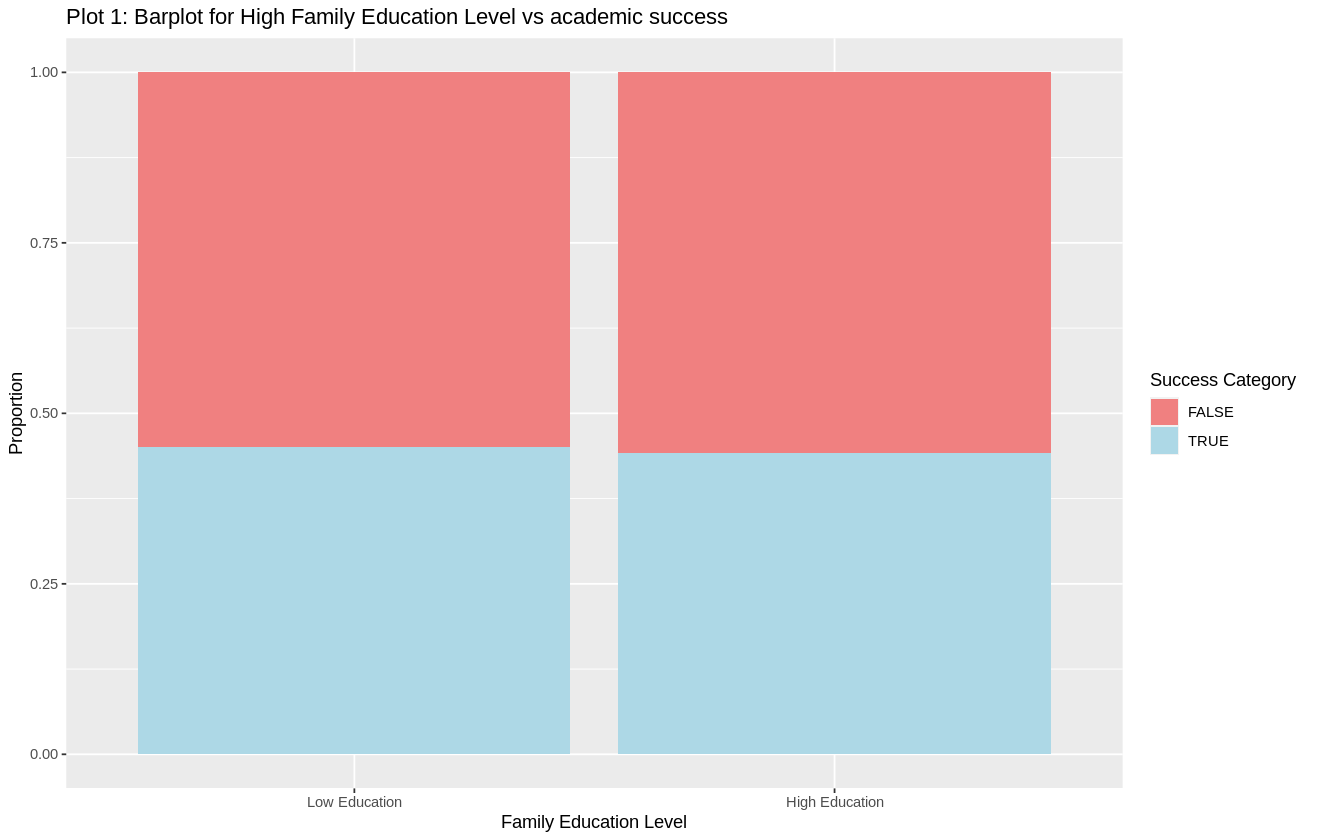

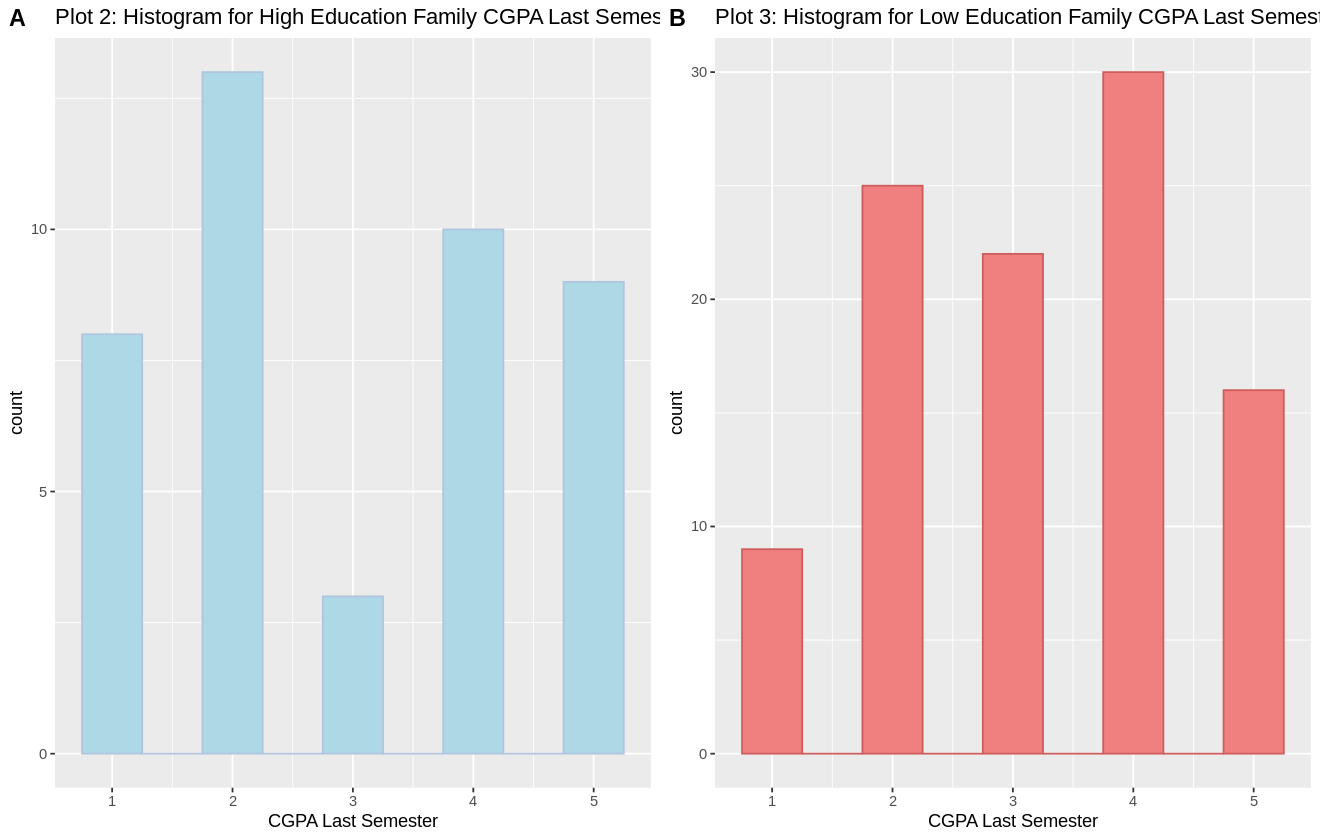

In [6]:
options(repr.plot.width = 11, repr.plot.height = 7) 
# Count number of students in each of the groups
Student_Tally <- 
    student_data |>
    group_by(high_education_family, academically_successful) |>
    tally()

# Calculate proportions of academically successful students for each family education level
Student_Props <- tibble(low_education_family = 46/(46+56), high_education_family = 19/(24+19))

# Barplot for High Family Education Level vs academic success
Student_Bar_Plot <- student_data |>
  ggplot(aes(x = high_education_family, fill = academically_successful)) +
  geom_bar(position = "fill") +
  scale_fill_manual(values = c("#f08080", "#add8e6")) +
  scale_x_discrete(labels = c("Low Education", "High Education")) +  # Change labels here
  labs(x = "Family Education Level", 
       fill = "Success Category",
       title = "Plot 1: Barplot for High Family Education Level vs academic success") +
  ylab("Proportion")

# Histogram for High Education Family CGPA Last Semester
histogram_High_Education_CGPA_Last_Semester <- 
    student_data |>
    filter(high_education_family == TRUE) |> 
    ggplot(aes(x = CGPA_Last_Semester)) +
    geom_histogram(binwidth = 0.5, fill = "#add8e6", color = "#b0c4de") + 
    labs(x = "CGPA Last Semester", title = "High Education Families") +
    ggtitle("Plot 2: Histogram for High Education Family CGPA Last Semester")

# Histogram for Low Education Family CGPA Last Semester
histogram_Low_Education_CGPA_Last_Semester <- 
    student_data |>
    filter(high_education_family == FALSE) |> 
    ggplot(aes(x = CGPA_Last_Semester)) +
    geom_histogram(binwidth = 0.5, fill = "#f08080", color = "#cd5c5c") + 
    labs(x = "CGPA Last Semester", title = "Low Education Families") +
    ggtitle("Plot 3: Histogram for Low Education Family CGPA Last Semester")


summaries_family_edu <- student_data |>
    group_by(high_education_family) |>
    summarise(mean = mean(CGPA_Last_Semester, na.rm = TRUE),
              sd = sd(CGPA_Last_Semester, na.rm = TRUE))

plot_grid <- plot_grid(histogram_High_Education_CGPA_Last_Semester, 
                       histogram_Low_Education_CGPA_Last_Semester,
                       labels = "AUTO", ncol = 2, align = 'h') 

Student_Props
print("Table 2: Proportion of acedmically successful students for each level of family education")
Student_Bar_Plot
summaries_family_edu
print("Table 3: Summary of CGPA Last Semester by Family Education")
plot_grid

## Methods:

Based on our research, we decided to compare the academic success of an individual student with the education level of their parents. to do this we sepearated each student into two groups: High education families and low education families. We determined that a high education family is one in which either parent has a university degree. To measure academic success, we used the students' last semester GPA. We determined that an academically successful student was one who had a GPA of above 3.0. We decided on this metric because we felt like it denoted a good threshhold for which students are perceived as acedemically successful. Our data came from UC Irvine, which is considered a top University in the US, so students with a 3.0 GPA or higher are clearly achieving a level of academic success as indicated by their grades.

In our initial analysis, we found that there were a large enough amount of students in each level of family education for the analysis to be appropriate. Additionally, we found that the proportions for our sample were really similar for each group. However, this is not enough to conclusively say that the education level of the family doesn't make a difference. Our sample is relatively small compared to the overall population we are interested in, that of all students at UC Irvine. Additionally, our analysis doesn't provide information on the accuracy of our result. Therefore, additional analysis must be conducted to further explore the relationship.

To determine the relationship between our two variaables, we will first coduct a hypothesis test. We will use $p_h$ to denote the proportion of students from high education families and $p_l$ to denote the proportion from low education families. Our hypotheses are as follows:
$$
H_0: p_h - p_l = 0 \\
H_A: p_h - p_l \neq 0
$$
In our hypothesis test, we will use $\alpha = 0.05$.

To further compare the relationship between our variables we will use bootstrapping to obtain a confidence interval for the difference between the two proportions. This will help us determine whether there is a difference, how extreme the difference is, and which group has a higher chance for academic success.

## Expected outcomes and significance:
#### Expected outcomes:
From our initial analysis, we suspect that there is no significant difference between the proportion of students from high education families and the proportion of students from low education families.

#### Impact of Findings:
The findings could offer valuable insights into the disparities between first generation students and students with parents from high education. Recognizing the impact of parental education levels could become a crucial factor in shaping the focus of future studies. Furthermore, these findings provide an opportunity for educational institutions to better understand the disparities among students, prompting them to allocate resources effectively to support struggling groups. Depending on the results, these findings may also challenge common stereotypes and public perceptions regarding the correlation between parental education levels and a child's educational achievements, potentially fostering a more equitable and informed approach to education.

#### For Future:
Further questions would arise such as how different variables aside from parental education comes and play a role in affecting a student's academic performance. Moreover, for the future, our study could be expanded upon to include more students and that of different universities as we only include students at UC Irvine which might not be exactly representative of our actual population.

## Work Cited:
1. Makewa, L. N., Role, E., & Otewa, F. (2012). Parental factors affecting academic achievement of grade six pupils in Kisumu city, Kenya. International Journal of Asian Social Science, 2(11), 1984-1997.

2. Pascarella, E. T., & Terenzini, P. T. (2005). How College Affects Students: A Third Decade of Research. Volume 2. Jossey-Bass, An Imprint of Wiley. 10475 Crosspoint Blvd, Indianapolis, IN 46256.

3. Reardon, S. F. (2011). The widening academic achievement gap between the rich and the poor: New evidence and possible explanations. Whither opportunity, 1(1), 91-116.

4. Higher Education Students Performance Evaluation. Retrieved from https://archive.ics.uci.edu/dataset/856/